# Clustering
Cluster analysis, or clustering, is an unsupervised machine learning task.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

A cluster is often an area of density in the feature space where examples from the domain (observations or rows of data) are closer to the cluster than other clusters. The cluster may have a center (the centroid) that is a sample or a point feature space and may have a boundary or extent.

Clustering can be helpful as a data analysis activity in order to learn more about the problem domain, so-called pattern discovery or knowledge discovery.

Clustering can also be useful as a type of feature engineering, where existing and new examples can be mapped and labeled as belonging to one of the identified clusters in the data.

Evaluation of identified clusters is subjective and may require a domain expert, although many clustering-specific quantitative measures do exist. Typically, clustering algorithms are compared academically on synthetic datasets with pre-defined clusters, which an algorithm is expected to discover.

### Examples of Clustering Algorithms
1. Library Installation
2. Clustering Dataset
3. Affinity Propagation
4. Agglomerative Clustering
5. BIRCH
6. DBSCAN
7. K-Means
8. Mini-Batch K-Means
9. Mean Shift
10. OPTICS
11. Spectral Clustering
12. Gaussian Mixture Model

Each algorithm offers a different approach to the challenge of discovering natural groups in data.

There is no best clustering algorithm, and no easy way to find the best algorithm for your data without using controlled experiments.

In [1]:
# clustering dataset
import numpy as np
#from numpy import where
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# %matplotlib notebook
display(make_classification)

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)>

[[-0.86703024  0.28977206]
 [ 2.00504927  0.44833494]
 [ 2.45911497  0.36711487]
 [ 0.37345218  1.71338168]
 [-1.2587854  -0.28230171]]


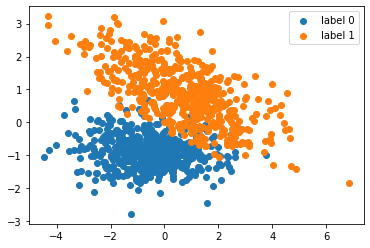

In [11]:
# defines the data
X1, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_clusters_per_class=1, random_state=4)

# print(X[0], y[:10])
# for class_value in range(2):
#     row_ix = where(y == class_value)
#     plt.scatter(X[row_ix, 0], X[row_ix, 1])

## PCA plot
pca = PCA(n_components=2)
result = pca.fit_transform(X1)
print(result[:5])
cluster1 = list()
cluster2 = list()
for i, vec in zip(y, result):
    if i == 0:
        cluster1.append(vec)
    elif i == 1:
        cluster2.append(vec)
        
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='label 0')
plt.scatter(cluster2[:, 0], cluster2[:, 1], label='label 1')
plt.legend()
# plt.show()

## Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

ref.: Clustering by Passing Messages Between Data Points https://www.science.org/doi/abs/10.1126/science.1136800

[ 0 11  1 11 19  9  1 15  2  2]
[[ 1.22515974 -0.95173116]
 [ 0.63389285 -1.64812098]
 [ 1.53543025  0.16097692]]
[0 1 2 3 4 5 6 7 8 9]


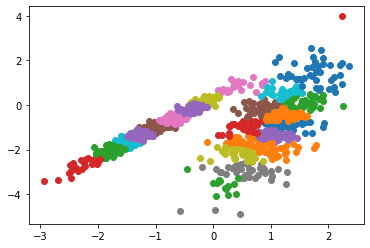

In [4]:
from sklearn.cluster import AffinityPropagation
# %matplotlib notebook


X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=4)

model = AffinityPropagation(damping=0.9, random_state=0)
model.fit(X)
print(model.labels_[:10])
# prediction
yhat = model.predict(X)
print(model.cluster_centers_[:3])
# retrieve unique clusters
clusters = np.unique(yhat)
print(clusters[:10])
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

# the result is complexity to analyst

## Agglomerative Clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods. It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data

labels: [0 0 0 0 0 1 0 0 0 0]
num clusters: 2
connected components: 1
children: (999, 2)
nodes distances: (999,)
leaves: 1000


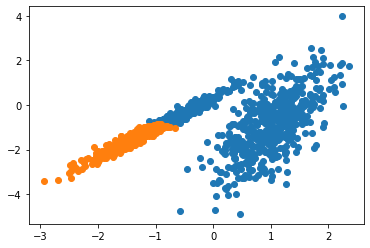

In [10]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, compute_distances=True)

yhat = model.fit_predict(X)

print(f'labels: {model.labels_[:10]}')
print('num clusters: %d' % model.n_clusters_)  # int value
print('connected components: %d' % model.n_connected_components_) # number of connected components in the graph.
print(f'children: {model.children_.shape}')  # the children of non-leaf node.
print(f'nodes distances: {model.distances_.shape}')#distance between nodes in the corresponding place in children_
print('leaves: %d' % model.n_leaves_)

clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## result showed a reasonable grouping is found 

## BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

root of CFtree: <sklearn.cluster._birch._CFNode object at 0x7f67ea33c710>
leaves: <sklearn.cluster._birch._CFNode object at 0x7f67ea33c310>
centroids of subclusters: [[ 1.42955364  0.58348098]
 [ 1.54149018  0.55711611]
 [ 1.72003933  0.34465173]
 ...
 [-0.66531179 -0.55274257]
 [-0.66392679 -0.40282243]
 [-0.50596116 -0.3450758 ]]
leaves labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
labels: [0 0 0 0 1]


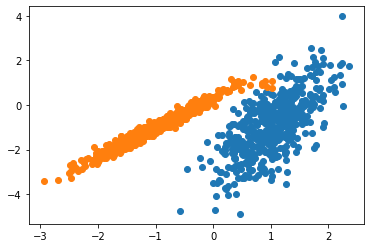

In [17]:
from sklearn.cluster import Birch


model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
print(f'root of CFtree: {model.root_}') # root of the cftree
print(f'leaves: {model.dummy_leaf_}') # point to all the leaves
print(f'centroids of subclusters: {model.subcluster_centers_}') # centroids of all subclusters read from leaves
print(f'leaves labels: {model.subcluster_labels_[:20]}') # based on X 
print(f'labels: {model.labels_[:5]}')

yhat = model.predict(X)
# print(yhat)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## seem it is a good classification

## DBSCAN
DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996. https://www.osti.gov/biblio/421283

indices of core samples: (910,)
core sample by training: (910, 2)
cluster labels: (1000,)


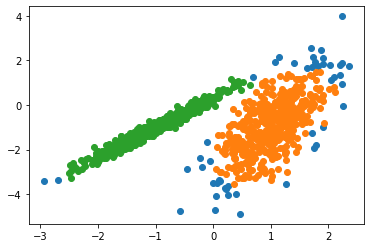

In [34]:
from sklearn.cluster import DBSCAN

## eps: the maximum distance between two samples for one to be considered as in the neighborhood of the other.
## this most important param to choose appropriately for the data set and distance function
## min_samples: number of sample (or total weight) in a neighborhood for a point to be considered as a core point.

model = DBSCAN(eps=0.3, min_samples=9)
yhat = model.fit_predict(X)

print(f'indices of core samples: {model.core_sample_indices_.shape}')
print(f'core sample by training: {model.components_.shape}') #(n_core_samples, n_features)
print(f'cluster labels: {model.labels_.shape}')
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

##  a reasonable grouping

## K-Means
K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

coordinates of cluster centers: [[-1.21826331 -1.29977057]
 [ 0.728185   -2.02580969]
 [ 0.92388257  0.11881037]]
labels: (1000,)
sum of squared distances of samples: 806.6065849957705
number of iterations run: 12


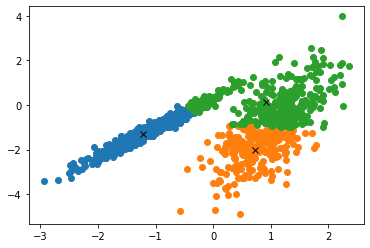

In [48]:
from sklearn.cluster import KMeans


## n_clusters: the number of cluster = number of centroids to generate
model = KMeans(n_clusters=3)
model.fit(X)
print(f'coordinates of cluster centers: {model.cluster_centers_}') # (n_clusters, n_features)
print(f'labels: {model.labels_.shape}')
print(f'sum of squared distances of samples: {model.inertia_}')
print(f'number of iterations run: {model.n_iter_}')

yhat = model.predict(X)

clusters = np.unique(yhat)
for centroid in model.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'x', color='black')
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

cluster center: [[ 0.95364198  0.13697612]
 [-1.22688202 -1.31334131]
 [ 0.72142399 -2.00053861]]
labels: (1000,)
inertia criterion: 807.3038494260356
number of batches processed: 26
Weight sum of each cluster: [1010. 1201.  689.]
effective number of samples used for the initialization: 300


/home/chuongnet/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The attribute 'counts_' is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/home/chuongnet/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The attribute 'init_size_' is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


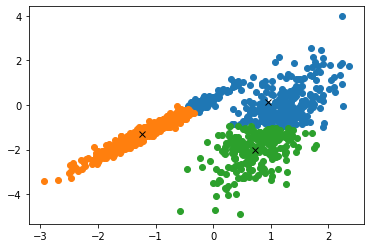

In [54]:
from sklearn.cluster import MiniBatchKMeans


model = MiniBatchKMeans(n_clusters=3)
model.fit(X)

print(f'cluster center: {model.cluster_centers_}')
print(f'labels: {model.labels_.shape}')
#associate with the chosen partition, defined as sum of square distances of samples to their nearest neigbor
print(f'inertia criterion: {model.inertia_}') 
print(f'number of batches processed: {model.n_iter_}')
print(f'Weight sum of each cluster: {model.counts_}')
print(f'effective number of samples used for the initialization: {model.init_size_}')
yhat = model.predict(X)
clusters = np.unique(yhat)
for cent in model.cluster_centers_:
    plt.plot(cent[0], cent[1], 'x', color='black')
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Mean Shift
Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

It is implemented via the MeanShift class and the main configuration to tune is the “bandwidth” hyperparameter.

max number of iterations performaned on each seed: 62


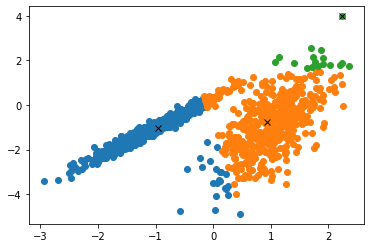

In [57]:
from sklearn.cluster import MeanShift


model = MeanShift()

yhat = model.fit_predict(X)

print(f'max number of iterations performaned on each seed: {model.n_iter_}')

clusters = np.unique(yhat)

for cent in model.cluster_centers_:
    plt.plot(cent[0], cent[1], 'x', color='black')
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## OPTICS
OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

It is implemented via the OPTICS class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

labels: (1000,)
reachability distance per sample: (1000,)
cluster ordered list: (1000,)
core distance_core point_: (1000,)
point, a sample was reached from: (1000,)
cluster hierarchy: (22, 2)


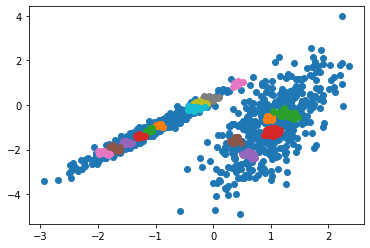

In [63]:
from sklearn.cluster import OPTICS


model = OPTICS(eps=0.8, min_samples=10)
yhat = model.fit_predict(X)

print(f'labels: {model.labels_.shape}')
print(f'reachability distance per sample: {model.reachability_[model.ordering_].shape}')
print(f'cluster ordered list: {model.ordering_.shape}')
print(f'core distance_core point_: {model.core_distances_.shape}')
print(f'point, a sample was reached from: {model.predecessor_.shape}')
print(f'cluster hierarchy: {model.cluster_hierarchy_.shape}')

clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Spectral clustering
Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

It is implemented via the SpectralClustering class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

affinity matrix used for clustering: (1000, 1000)


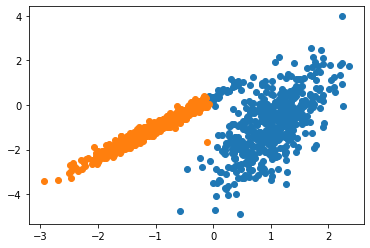

In [65]:
from sklearn.cluster import SpectralClustering


model = SpectralClustering(n_clusters=2)
yhat = model.fit_predict(X)

print(f'affinity matrix used for clustering: {model.affinity_matrix_.shape}') #(n_samples, n_samples)

clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Gaussian Mixture model
A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

It is implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

weights components: [0.50038716 0.49961284]
covariances components: [[[0.40490335 0.53714521]
  [0.53714521 0.73896448]]

 [[0.23595013 0.42588545]
  [0.42588545 1.717678  ]]]
means: [[-1.00942778 -1.01540805]
 [ 1.00943592 -0.9266888 ]]
precisions: [[[ 69.16411951 -50.27464281]
  [-50.27464281  37.8973336 ]]

 [[  7.67135857  -1.90205614]
  [ -1.90205614   1.05378193]]]
precision cholesky: [[[ 1.57153594 -8.1666636 ]
  [ 0.          6.15608103]]

 [[ 2.05868496 -1.85288284]
  [ 0.          1.02653881]]]
converged: True
steps best fit: 9
lower bound value: -2.016878010382068


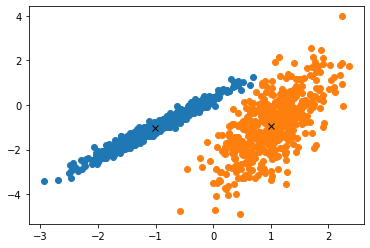

In [70]:
from sklearn.mixture import GaussianMixture


model = GaussianMixture(n_components=2)
model.fit(X)
yhat = model.predict(X)

print(f'weights components: {model.weights_}')
print(f'covariances components: {model.covariances_}')
print(f'means: {model.means_}')
print(f'precisions: {model.precisions_}') # inverse of covariance matrix
print(f'precision cholesky: {model.precisions_cholesky_}')
print(f'converged: {model.converged_}')
print(f'steps best fit: {model.n_iter_}')
print(f'lower bound value: {model.lower_bound_}')

clusters = np.unique(yhat)

for m in model.means_:
    plt.plot(m[0], m[1], 'x', color='black')
    
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()